<h1> ASSOCIATION RULE </h1>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('Dataset\GroceryStoreDataSet.csv')
data

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [28]:
GS = data.copy()
GS.head(2)

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"


In [29]:
GS.columns = ['Items']
GS.head()

,Items
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"


In [30]:
print(f"SALE ORDERS: {GS.shape[0]}, UNIQUE ORDERS: {len(GS.index.unique())} UNIQUE ITEMS:{len(GS.value_counts())}")

SALE ORDERS: 19, UNIQUE ORDERS: 19 UNIQUE ITEMS:16


In [31]:
%pip install mlxtend --q

Note: you may need to restart the kernel to use updated packages.


In [32]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

Transform the variables to list of list
AND
Label Encoder/Encoded

In [33]:
# -------- Transform the variables to become a list of lists -------
sales = [] # ------------------------------------------------------------------- empty container for taking the lists
item = GS['Items'].values # -------------------------------------------------- Turn it into values

for i in range (0,len(item)): # ------------------------------------------------ Iterate through the items
    sales.append(item[i].split(",")) # ----------------------------------------- Split each item on the occasions of comma
print(f"Before encoding:\n {sales[0:3]}")

encoder = TransactionEncoder() # ----------------------------------------------- instantiate the encoder
encoded = encoder.fit(sales).transform(sales) # -------------------------------- Fit transform the new data (list of lists)
print(f"After encoding:\n {encoded[0:3]}")

Before encoding:
 [['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK']]
After encoding:
 [[ True False  True False False  True False False  True False False]
 [False  True  True False False False False False False False  True]
 [False False  True False False False  True  True  True False False]]


In [34]:
# Turn encoded data to a dataframe. 'True' to be 1, and all 'False' to be 0
encodedData = pd.DataFrame(data = encoded, columns = encoder.columns_, dtype = int)
encodedData.head(3)

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,1,1,0,0


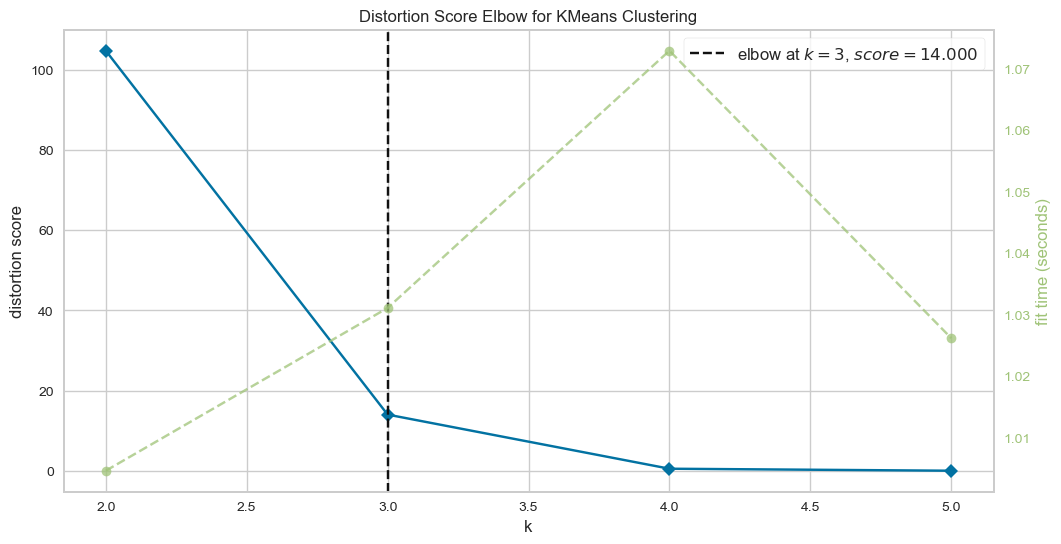

In [35]:
# create a support versus itemset size plot
support_levels = [0.1, 0.2, 0.3, 0.4, 0.5] # --------------------------------- List out desired
itemset_sizes = []
for support in support_levels:
    frequent_itemsets = apriori(encodedData, min_support=support, use_colnames = True)
    itemset_sizes.append(len(frequent_itemsets))

plt.figure(figsize = (12, 6))
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)

visualizer = KElbowVisualizer(km, k=5, metric='distortion')
visualizer.fit(pd.DataFrame(itemset_sizes).values)
visualizer.show()
plt.show()

In [36]:
support_levels = [0.1, 0.2, 0.3, 0.4, 0.5] # ----------------------------------- List out desired support levels
itemset_sizes = []
for support in support_levels:
    frequent_itemsets = apriori(encodedData, min_support=support, use_colnames=True)
    itemset_sizes.append(len(frequent_itemsets))
    display(frequent_itemsets)

,support,itemsets
0,0.315789,(BISCUIT)
1,0.210526,(BOURNVITA)
2,0.631579,(BREAD)
3,0.157895,(COCK)
4,0.421053,(COFFEE)
5,0.315789,(CORNFLAKES)
6,0.105263,(JAM)
7,0.263158,(MAGGI)
8,0.210526,(MILK)
9,0.315789,(SUGER)


,support,itemsets
0,0.315789,(BISCUIT)
1,0.210526,(BOURNVITA)
2,0.631579,(BREAD)
3,0.421053,(COFFEE)
4,0.315789,(CORNFLAKES)
5,0.263158,(MAGGI)
6,0.210526,(MILK)
7,0.315789,(SUGER)
8,0.368421,(TEA)
9,0.210526,"(SUGER, BREAD)"


,support,itemsets
0,0.315789,(BISCUIT)
1,0.631579,(BREAD)
2,0.421053,(COFFEE)
3,0.315789,(CORNFLAKES)
4,0.315789,(SUGER)
5,0.368421,(TEA)


,support,itemsets
0,0.631579,(BREAD)
1,0.421053,(COFFEE)


,support,itemsets
0,0.631579,(BREAD)


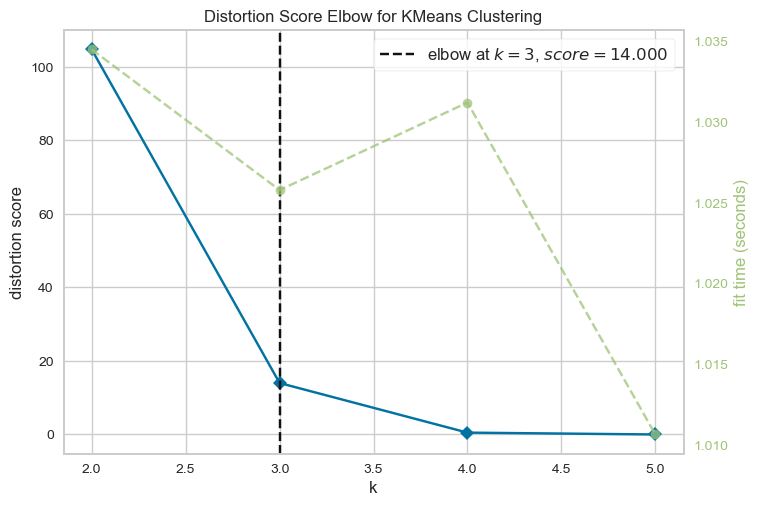

In [37]:
# !pip install yellowbrick  --q

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)

visualizer = KElbowVisualizer(km, k=5, metric='distortion')
visualizer.fit(pd.DataFrame(itemset_sizes).values)
visualizer.show()
plt.show()

In [38]:
support = apriori(encodedData, min_support = 0.3, use_colnames=True)
support.sort_values(by = 'support', ascending = False)

,support,itemsets
1,0.631579,(BREAD)
2,0.421053,(COFFEE)
5,0.368421,(TEA)
0,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.315789,(SUGER)


In [39]:
support = apriori(encodedData, min_support= 0.2,use_colnames=True)
support.sort_values(by = 'support', ascending = False)
confidence = association_rules(support, metric = 'confidence', min_threshold = 0.3)
confidence.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,0.732143
0,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,0.076923
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
7,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
2,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,-0.142857
8,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,0.854167
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
6,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
1,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,0.142857
3,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,-0.222222


<h3><b>INTERPRETATION</b></h3>

- <b><u>Leverage:</u></b> Leverage in Apriori is a measure that indicates how much more often the antecedent (the item(s) before the arrow) and consequent (the item(s) after the arrow) of a rule occur together in the dataset compared to what would be expected if they were independent of each other.<br>
If the leverage is positive, it means that the antecedent and consequent occur together more often than expected, indicating a positive association between them. A leverage of 1 means that the antecedent and consequent always occur together.<br>
If the leverage is negative, it means that the antecedent and consequent occur together less often than expected, indicating a negative association between them. A leverage of -1 means that the antecedent and consequent always occur separately.<br>
If the leverage is zero, it means that the antecedent and consequent occur together exactly as often as expected if they were independent of each other. This indicates that there is no association between them.

- <b><u>Conviction:</u></b> It measures how strongly the presence of one item in a transaction implies the presence of another item. A high conviction value of above 1 indicates a strong dependency between the two items, while a low value indicates a weaker dependency.<br>A conviction value of 1 indicates that the items A and B are independent, while a value greater than 1 indicates a positive association, and a value less than 1 indicates a negative association. <br>
<hr>